# Evaluation

In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import pickle
import seaborn as sns
from scipy.stats import pearsonr
from src import utils
import os
import random
import numpy as np

utils.plot_style()
torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)
os.makedirs('plots/', exist_ok=True)

## Varying number of molecules per cell

In [2]:
intensity_scales = [50*i for i in range(1, 9)]
n_datasets = 10

df_molecules = []

for intensity_scale in intensity_scales:
    for dataset in range(n_datasets):
        data = torch.load(
            '../../data/simulated/data/scalability/var_molecules/{}_{}.pt'
            .format(intensity_scale, dataset))
        results = pickle.load(open('results/var_molecules/{}_{}/final/other.pkl'.format(intensity_scale, dataset), 'rb'))

        df_molecules.append(pd.DataFrame({
            'intensity_scale' : intensity_scale,
            'dataset' : dataset,
            'n_molecules' : data['coordinates'].shape[0],
            'runtime_min' : results['runtime'] / 60000,
            'peak_allocated_GB' : results['memory_stats'][0][-1]['allocated_bytes.all.peak'] / 1e9,
        }, index=[0]))

df_molecules = pd.concat(df_molecules).reset_index()

## Varying number of cells

In [3]:
n_cells_list = [10*i for i in range(1, 6)]
n_datasets = 10

df_cells = []

for n_cells in n_cells_list:
    for dataset in range(n_datasets):
        data = torch.load(
            '../../data/simulated/data/scalability/var_cells/{}_{}.pt'
            .format(n_cells, dataset))
        results = pickle.load(open('results/var_cells/{}_{}/final/other.pkl'.format(n_cells, dataset), 'rb'))

        df_cells.append(pd.DataFrame({
            'intensity_scale' : intensity_scale,
            'dataset' : dataset,
            'n_cells' : n_cells,
            'runtime_min' : results['runtime'] / 60000,
            'peak_allocated_GB' : results['memory_stats'][-1][-1]['allocated_bytes.all.peak'] / 1e9,
        }, index=[0]))

df_cells = pd.concat(df_cells).reset_index()

## Varying number of factors

In [4]:
n_factors_list = [i for i in range(2, 8)]
n_datasets = 10

df_factors = []

for n_factors in n_factors_list:
    for dataset in range(n_datasets):
        data = torch.load(
            '../../data/simulated/data/scalability/var_factors/{}_{}.pt'
            .format(n_factors, dataset))
        results = pickle.load(open('results/var_factors/{}_{}/final/other.pkl'.format(n_factors, dataset), 'rb'))

        df_factors.append(pd.DataFrame({
            'intensity_scale' : intensity_scale,
            'dataset' : dataset,
            'n_factors' : n_factors,
            'runtime_min' : results['runtime'] / 60000,
            'peak_allocated_GB' : results['memory_stats'][-1][-1]['allocated_bytes.all.peak'] / 1e9,
        }, index=[0]))

df_factors = pd.concat(df_factors).reset_index()

## Plots

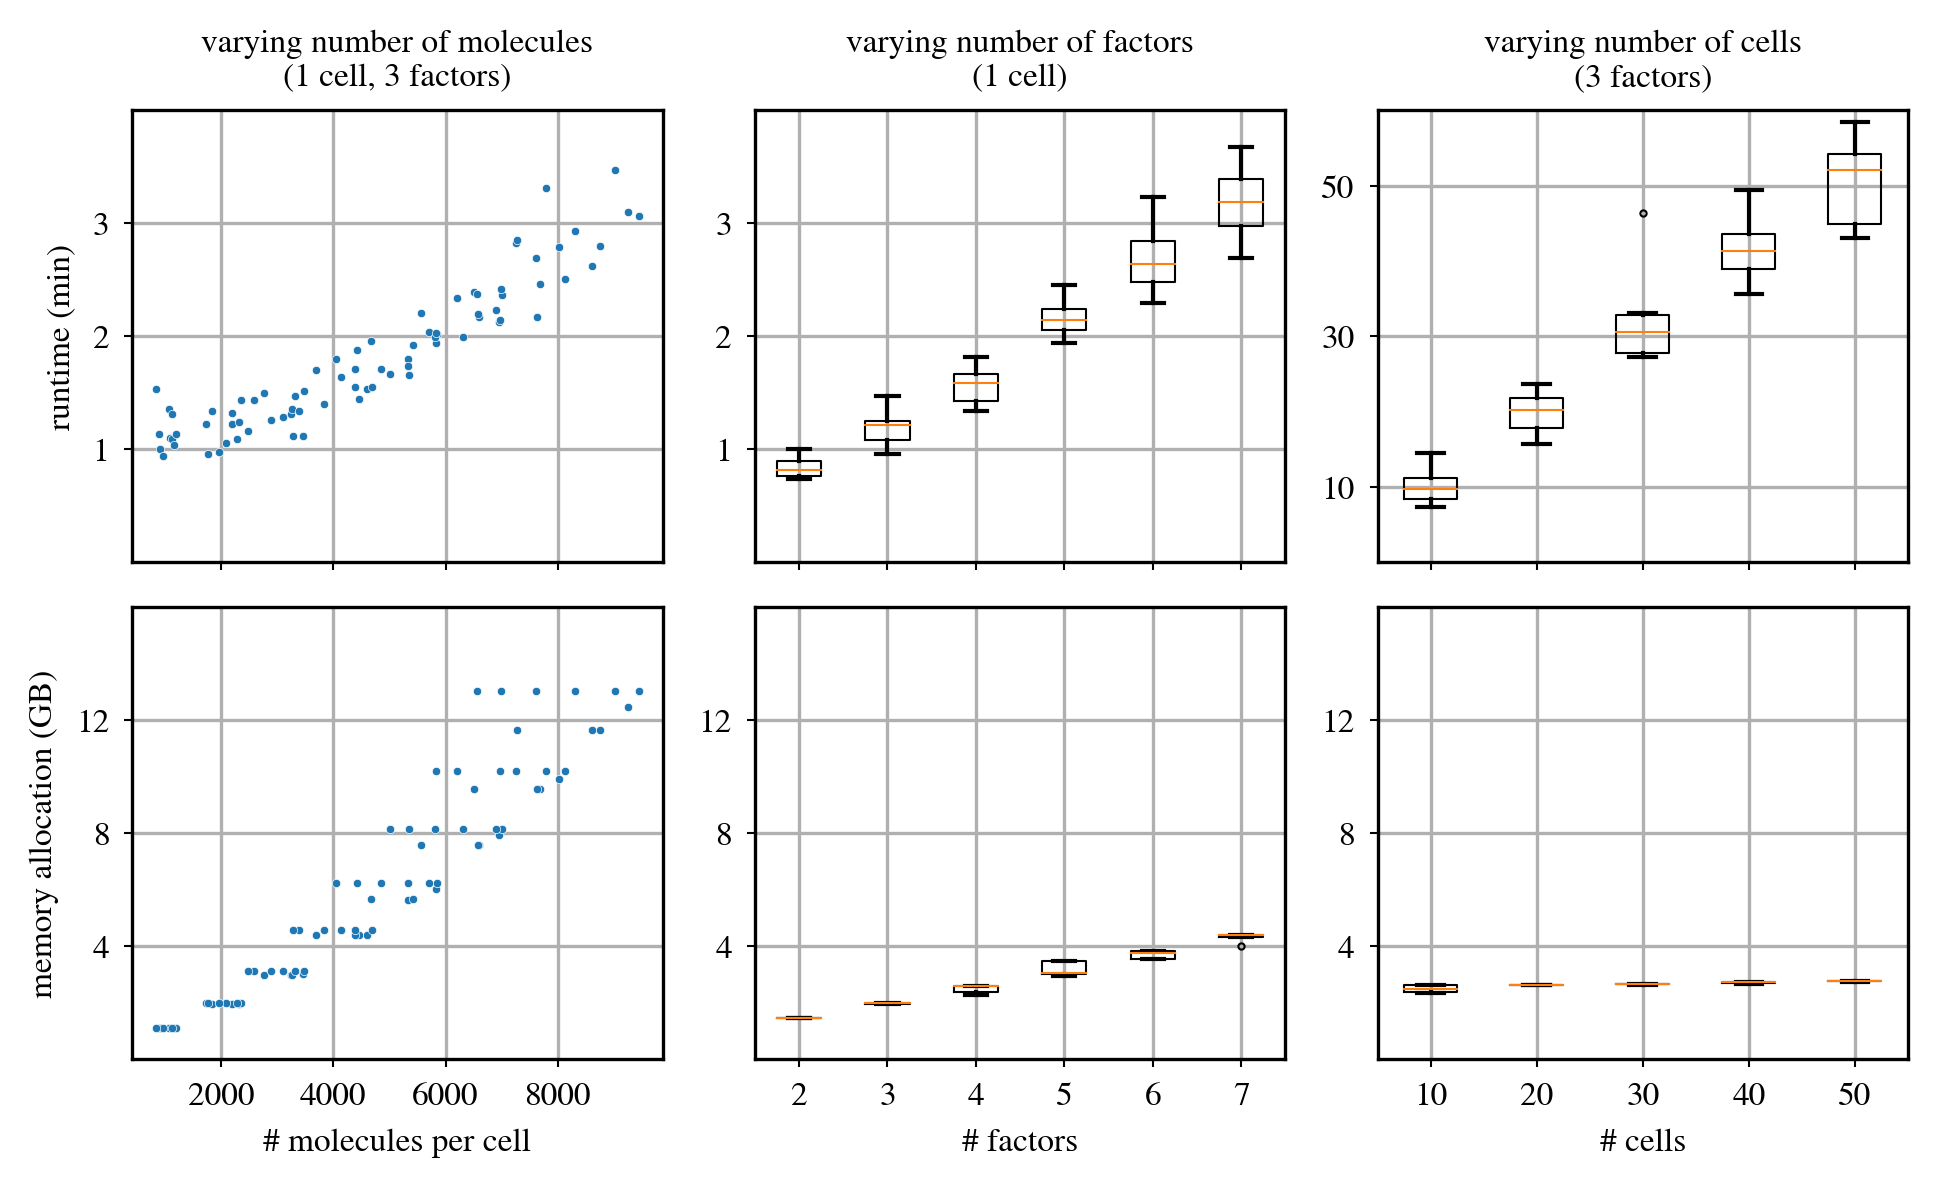

In [8]:
boxprops = dict(linewidth=0.5)
flierprops = dict(marker='o', markersize=1.5, markeredgewidth=0.5)
medianprops = dict(linewidth=0.5)
meanlineprops = dict(linewidth=0.5)

fig, axs = plt.subplots(2, 3, figsize=(6.5, 4), dpi=300)

size = 4

sns.scatterplot(df_molecules, x='n_molecules', y='runtime_min', ax=axs[0, 0], s=size)
sns.scatterplot(df_molecules, x='n_molecules', y='peak_allocated_GB', ax=axs[1, 0], s=size)
axs[0, 0].set_ylabel('runtime (min)')
axs[1, 0].set_ylabel('memory allocation (GB)')
axs[0, 0].set_title('varying number of molecules\n(1 cell, 3 factors)')
axs[0, 0].set_xticklabels([])
axs[1, 0].set_title('')
axs[0, 0].set_xlabel('')
axs[1, 0].set_xlabel('# molecules per cell')
axs[0, 0].set_yticks([1, 2, 3])
axs[1, 0].set_yticks([4, 8, 12])
axs[0, 0].set_ylim([0, 4])
axs[1, 0].set_ylim([0, 16])

x = [df_factors[df_factors.n_factors==i].runtime_min.values for i in n_factors_list]
axs[0, 1].boxplot(x, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanlineprops)
x = [df_factors[df_factors.n_factors==i].peak_allocated_GB.values for i in n_factors_list]
axs[1, 1].boxplot(x=x, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanlineprops)
axs[0, 1].set_title('varying number of factors\n(1 cell)')
axs[0, 1].set_xticklabels([])
axs[1, 1].set_xticklabels(n_factors_list)
axs[1, 1].set_xlabel('# factors')
axs[0, 1].set_yticks([1, 2, 3])
axs[1, 1].set_yticks([2, 3, 4])
axs[0, 1].set_ylim([0, 4])
axs[1, 1].set_ylim([1, 5])

x = [df_cells[df_cells.n_cells==i].runtime_min.values for i in n_cells_list]
axs[0, 2].boxplot(x, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanlineprops)
x = [df_cells[df_cells.n_cells==i].peak_allocated_GB.values for i in n_cells_list]
axs[1, 2].boxplot(x=x, boxprops=boxprops, flierprops=flierprops, medianprops=medianprops, meanprops=meanlineprops)
axs[0, 2].set_title('varying number of cells\n(3 factors)')
axs[0, 2].set_xticklabels([])
axs[1, 2].set_xticklabels(n_cells_list)
axs[1, 2].set_xlabel('# cells')
axs[0, 2].set_yticks([10, 30, 50])
axs[1, 2].set_yticks([2.3, 2.6, 2.9])
axs[0, 2].set_ylim([0, 60])
axs[1, 2].set_ylim([2.2, 3.])

axs[1, 0].set_ylim([0, 16])
axs[1, 1].set_ylim([0, 16])
axs[1, 2].set_ylim([0, 16])
axs[1, 0].set_yticks([4, 8, 12])
axs[1, 1].set_yticks([4, 8, 12])
axs[1, 2].set_yticks([4, 8, 12])

for ax in axs.flatten():
    ax.grid()
    ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('plots/scalability.svg')
